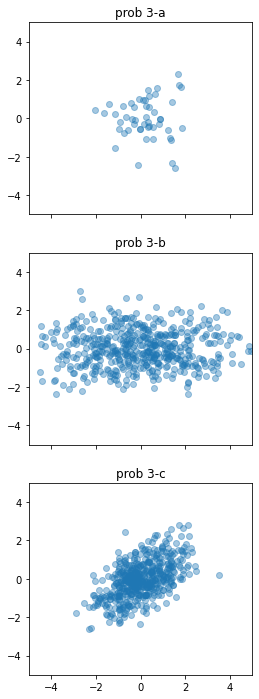

In [37]:
#Problem 3
import numpy as np
import matplotlib.pyplot as plt

#prob-a
mean = [0, 0]
cov_a = [[1, 0], [0, 1]]
cov_b = [[4, 0], [0, 1]]
cov_c = [[1, 0.5], [0.5, 1]]

x1, y1 = np.random.multivariate_normal(mean, cov_a, 50).T
x2, y2 = np.random.multivariate_normal(mean, cov_b, 500).T
x3, y3 = np.random.multivariate_normal(mean, cov_c, 500).T

fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(4,12))
plt.axis([-5, 5, -5, 5])
axs[0].scatter(x1, y1,alpha=0.4)
axs[0].set_title('prob 3-a')
axs[1].scatter(x2, y2,alpha=0.4)
axs[1].set_title('prob 3-b')
axs[2].scatter(x3, y3,alpha=0.4)
axs[2].set_title('prob 3-c')

plt.show()

In [ ]:
#Problem 5
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#function for visualize SVM
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [ ]:
df = pd.read_csv('data_svm_lin.csv',header = None)

#data와 class 분리
X = df[df.columns[:-1]]
y = df[df.columns[2]]

#정규화 작업
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# SVM 모델 생성
model = SVC(kernel='linear', C = 2, degree = 3)
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('5-a')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

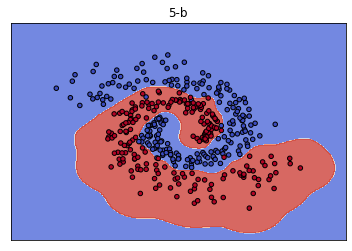

In [ ]:
#Problem 5-b
df = pd.read_csv('data_svm_rbf.csv',header = None)

#data와 class 분리
X = df[df.columns[:-1]]
y = df[df.columns[2]]

# 정규화 작업
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# SVM 모델 생성
model = SVC(kernel='rbf', C = 10, gamma = 7.0) 
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('5-b')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
